In [134]:
import pandas as pd
from pathlib import Path

In [83]:
years = '2016, 2017, 2018, 2019, 2020'.split(', ')
datapath = Path('../data/')
df = pd.concat([pd.read_csv(f'{datapath}/Dhaka_PM2.5_{year}_YTD.csv') for year in years])
df = pd.concat([df, pd.read_csv(f'{datapath}/Dhaka_PM2.5_2020_08_MTD.csv')])

In [84]:
# print(f'Number of measurements with AQI < 0 which is impossible unless measurement error: {len(df[df["AQI"]<0])}')
# print(f'Total number of measurements: {len(df)}, so bad data is {round(100*len(df[df["AQI"]<0])/len(df),2)} %' )

In [85]:
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Dhaka,PM2.5 - Principal,2016-01-01 01:00 AM,2016,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,Dhaka,PM2.5 - Principal,2016-01-01 02:00 AM,2016,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,Dhaka,PM2.5 - Principal,2016-01-01 03:00 AM,2016,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,Dhaka,PM2.5 - Principal,2016-01-01 04:00 AM,2016,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,Dhaka,PM2.5 - Principal,2016-01-01 05:00 AM,2016,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


In [86]:
df['Date'] = pd.to_datetime(df['Date (LT)'])
df = df.drop(columns=['Date (LT)'])

In [87]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37852 entries, 0 to 23
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Site           37852 non-null  object        
 1   Parameter      37852 non-null  object        
 2   Year           37852 non-null  int64         
 3   Month          37852 non-null  int64         
 4   Day            37852 non-null  int64         
 5   Hour           37852 non-null  int64         
 6   NowCast Conc.  37852 non-null  float64       
 7   AQI            37852 non-null  int64         
 8   AQI Category   36031 non-null  object        
 9   Raw Conc.      37852 non-null  float64       
 10  Conc. Unit     37852 non-null  object        
 11  Duration       37852 non-null  object        
 12  QC Name        37852 non-null  object        
 13  Date           37852 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 16.7 

In [88]:
df.head()

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,Date
0,Dhaka,PM2.5 - Principal,2016,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 01:00:00
1,Dhaka,PM2.5 - Principal,2016,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 02:00:00
2,Dhaka,PM2.5 - Principal,2016,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 03:00:00
3,Dhaka,PM2.5 - Principal,2016,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 04:00:00
4,Dhaka,PM2.5 - Principal,2016,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 05:00:00


<h2> Quality Control</h2>

Fortunately the data comes with a QC tag. Lets check the values:

In [89]:
df['QC Name'].value_counts()

Valid      35825
Missing     1873
Invalid      154
Name: QC Name, dtype: int64

In [80]:
df['QC Name'].value_counts(normalize=True)

Valid      0.946449
Missing    0.049482
Invalid    0.004068
Name: QC Name, dtype: float64

In [91]:
df[df['QC Name']=='Missing'].head()

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,Date
0,Dhaka,PM2.5 - Principal,2016,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 01:00:00
1,Dhaka,PM2.5 - Principal,2016,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 02:00:00
2,Dhaka,PM2.5 - Principal,2016,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 03:00:00
3,Dhaka,PM2.5 - Principal,2016,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 04:00:00
4,Dhaka,PM2.5 - Principal,2016,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing,2016-01-01 05:00:00


'Missing' data is self explanatory, the concentration values (the direct instrument measurement) are clearly nonsense because of some issue with measurement at the time. 

In [109]:
df[df['QC Name']=='Invalid'].tail(5)

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,Date
4377,Dhaka,PM2.5 - Principal,2020,7,9,14,25.1,78,Moderate,26.0,UG/M3,1 Hr,Invalid,2020-07-09 14:00:00
4378,Dhaka,PM2.5 - Principal,2020,7,9,15,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Invalid,2020-07-09 15:00:00
4379,Dhaka,PM2.5 - Principal,2020,7,9,16,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Invalid,2020-07-09 16:00:00
4380,Dhaka,PM2.5 - Principal,2020,7,9,17,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Invalid,2020-07-09 17:00:00
4497,Dhaka,PM2.5 - Principal,2020,7,15,13,69.9,158,Unhealthy,291.0,UG/M3,1 Hr,Invalid,2020-07-15 13:00:00


The 'Invalid' data is less obvious. Some have nonsensical AQI values, but some have what appear to be sensible concentration and AQI values. But lets trust the datasource's QC tag and omit these. Especially as there are so few of them. 

In [93]:
df_valid = df[df['QC Name']=='Valid']

In [102]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35825 entries, 1441 to 23
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Site           35825 non-null  object        
 1   Parameter      35825 non-null  object        
 2   Year           35825 non-null  int64         
 3   Month          35825 non-null  int64         
 4   Day            35825 non-null  int64         
 5   Hour           35825 non-null  int64         
 6   NowCast Conc.  35825 non-null  float64       
 7   AQI            35825 non-null  int64         
 8   AQI Category   35760 non-null  object        
 9   Raw Conc.      35825 non-null  float64       
 10  Conc. Unit     35825 non-null  object        
 11  Duration       35825 non-null  object        
 12  QC Name        35825 non-null  object        
 13  Date           35825 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 4.

There is still some null values for the AQI Category. Lets inspect:

In [111]:
df_valid[df_valid['AQI Category'].isnull()]

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,Date
1441,Dhaka,PM2.5 - Principal,2016,3,1,2,-999.0,-999,NaN,196.0,UG/M3,1 Hr,Valid,2016-03-01 02:00:00
5865,Dhaka,PM2.5 - Principal,2016,9,1,10,-999.0,-999,NaN,26.0,UG/M3,1 Hr,Valid,2016-09-01 10:00:00
177,Dhaka,PM2.5 - Principal,2017,1,8,10,-999.0,-999,NaN,168.0,UG/M3,1 Hr,Valid,2017-01-08 10:00:00
1385,Dhaka,PM2.5 - Principal,2017,2,27,18,-999.0,-999,NaN,85.0,UG/M3,1 Hr,Valid,2017-02-27 18:00:00
3442,Dhaka,PM2.5 - Principal,2017,5,24,11,-999.0,-999,NaN,44.0,UG/M3,1 Hr,Valid,2017-05-24 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,Dhaka,PM2.5 - Principal,2020,3,21,11,-999.0,-999,NaN,203.0,UG/M3,1 Hr,Valid,2020-03-21 11:00:00
1950,Dhaka,PM2.5 - Principal,2020,3,22,11,-999.0,-999,NaN,68.0,UG/M3,1 Hr,Valid,2020-03-22 11:00:00
3346,Dhaka,PM2.5 - Principal,2020,5,27,15,-999.0,-999,NaN,9.0,UG/M3,1 Hr,Valid,2020-05-27 15:00:00
4381,Dhaka,PM2.5 - Principal,2020,7,9,18,-999.0,-999,NaN,16.0,UG/M3,1 Hr,Valid,2020-07-09 18:00:00


There are clearly some issues with these data, despite being classed as valid in the QC tag. We should omit these values too from our analysis by masking for AQI values less than zero (AQI less than zero is impossible assuming all is well with the data). 

In [112]:
df_valid = df_valid[df_valid['AQI']>0]

In [113]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35760 entries, 1442 to 23
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Site           35760 non-null  object        
 1   Parameter      35760 non-null  object        
 2   Year           35760 non-null  int64         
 3   Month          35760 non-null  int64         
 4   Day            35760 non-null  int64         
 5   Hour           35760 non-null  int64         
 6   NowCast Conc.  35760 non-null  float64       
 7   AQI            35760 non-null  int64         
 8   AQI Category   35760 non-null  object        
 9   Raw Conc.      35760 non-null  float64       
 10  Conc. Unit     35760 non-null  object        
 11  Duration       35760 non-null  object        
 12  QC Name        35760 non-null  object        
 13  Date           35760 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 4.

<h1> EDA </h1>

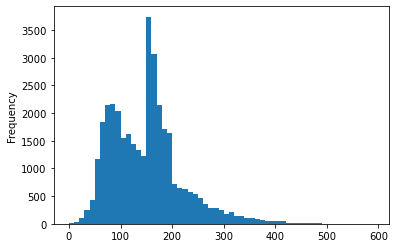

In [137]:
df_valid['AQI'].plot(kind='hist')

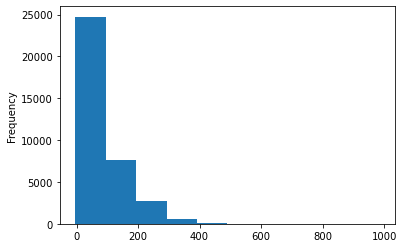

In [138]:
df_valid['Raw Conc.'].plot(kind='hist')

In [130]:
df_valid['AQI Category'].value_counts(normalize=True)

Unhealthy                         0.343876
Moderate                          0.263479
Unhealthy for Sensitive Groups    0.199609
Very Unhealthy                    0.131152
Hazardous                         0.036605
Good                              0.025280
Name: AQI Category, dtype: float64

<h2>Everything appears okay here. Lets move on to the analysis and visualisations of the data: </h2>
[Analysis Notebook](./analysis-visualisation.ipynb)

In [141]:
df_valid.to_csv(f'{datapath}/clean_data.csv')